# Group Project 1

#### Project Members:
* Claire O'Brien (51913846): eclaireobrien@gmail.com
* Elaine Tao (22213367): elaine.tao0711@gmail.com
* Cynthia Wang (25804212): cynthiacwwang@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nobel = pd.read_csv("data/nobel.csv") #change to nobel.csv

**1. Read the data in your notebook and display the first 8 rows. How many columns and rows are there in this dataset? What are the column names?**

In [3]:
nobel.head(8)

,year,category,prize,motivation,price_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,gender,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry,in recognition of the extraordinary services h...,1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,the Netherlands,male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature,in special recognition of his poetic compositi...,1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Peace,The Nobel Peace Prize,for his lifelong work for international peace ...,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,male,NaN,NaN,NaN,1912-06-12,Paris,France
3,1901,Peace,The Nobel Peace Prize,for his humanitarian efforts to help wounded s...,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Physics,The Nobel Prize in Physics,in recognition of the extraordinary services h...,1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep,Prussia,male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
5,1901,Physiology or Medicine,The Nobel Prize in Physiology or Medicine,"for his work on serum therapy, especially its ...",1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf,Prussia,male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry,in recognition of the extraordinary services h...,1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia,male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature,the greatest living master of the art of histo...,1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig,male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany


In [4]:
nobel.shape

(989, 18)

In [5]:
nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'price_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'gender', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

**2. All of the first 8 winners were from Europe, but that was back in 1901. Looking at all winners in this data, which gender and which country is the most commonly represented?**

In [6]:
nobel.groupby('gender')['prize'].count()

gender
female     61
male      898
Name: prize, dtype: int64

In [7]:
bc = nobel.groupby('birth_country')['prize'].count()
bc.idxmax(), bc.max()

('USA', 296)

**3. For the dominant country that you found in question 2, calculate the proportions of winners from that country in each decade. Make some plots to visualize your results. In which  decade did the proportion reach the highest? For the following questions, please exclude organizational laureates and focus on individual laureates. (Hint: laureate_type == ‘individual’)**

In [8]:
nobelindividual = nobel[nobel['laureate_type']=='Individual'].reset_index()
nobelindividual['decade'] = (nobelindividual['year']//10)*10
nobelsample = nobelindividual.groupby(['birth_country','decade'])['prize'].count().reset_index()
america = nobelsample[nobelsample['birth_country'] == 'USA'].reset_index()
total = nobelindividual.groupby('decade')['prize'].count().reset_index()
for n in range(13):
    y = america['decade'][n]
    x = round((america['prize'][n] / total['prize'][n])*100,1)
    print(y,"-",x,'%')

1900 - 1.8 %
1910 - 7.9 %
1920 - 7.4 %
1930 - 25.5 %
1940 - 32.5 %
1950 - 29.6 %
1960 - 28.0 %
1970 - 32.0 %
1980 - 33.0 %
1990 - 41.6 %
2000 - 43.7 %
2010 - 33.3 %
2020 - 41.7 %


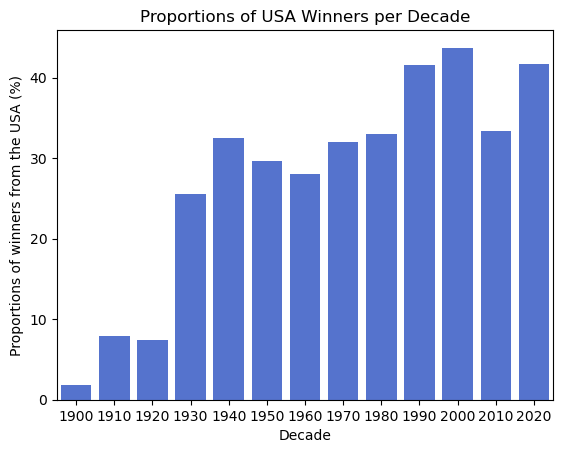

In [9]:
p = round((america['prize'] / total['prize'])*100,1)
sns.barplot(x = total['decade'], y = p, color="royalblue")
plt.title("Proportions of USA Winners per Decade")
plt.xlabel('Decade')
plt.ylabel('Proportions of winners from the USA (%)')
plt.show()

**4. Is there any gender imbalance in this data? How significant is that? Calculate the proportion of female laureates in each decade. Visualize your results and discuss.**

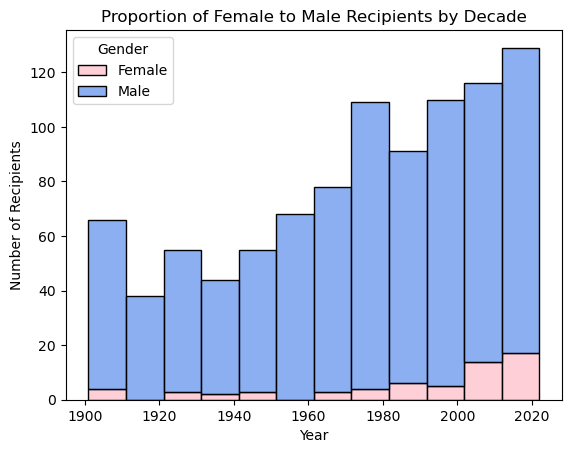

In [10]:
sns.histplot(data = nobel, x = "year", hue = "gender",
             multiple = "stack", palette = ["cornflowerblue","pink"])
plt.title("Proportion of Female to Male Recipients by Decade")
plt.xlabel("Year")
plt.ylabel("Number of Recipients")
plt.legend(title = "Gender", labels = ["Female", "Male"])
plt.show()

In [11]:
nobelgender = nobelindividual.groupby(['gender','decade'])['prize'].count().reset_index()
nobelfemale = nobelgender[nobelgender["gender"] == "female"].reset_index()
gendertotal = nobelindividual.groupby(['decade'])['prize'].count().reset_index()
for a in range(12):
    fy = nobelfemale['decade'][a]
    fx = round((nobelfemale['prize'][a] / gendertotal['prize'][a])*100,1)
    print(fy,"-",fx,'%')

1900 - 5.4 %
1910 - 2.6 %
1920 - 3.7 %
1930 - 5.5 %
1940 - 7.5 %
1960 - 4.2 %
1970 - 5.3 %
1980 - 3.9 %
1990 - 7.4 %
2000 - 10.9 %
2010 - 10.9 %
2020 - 6.0 %


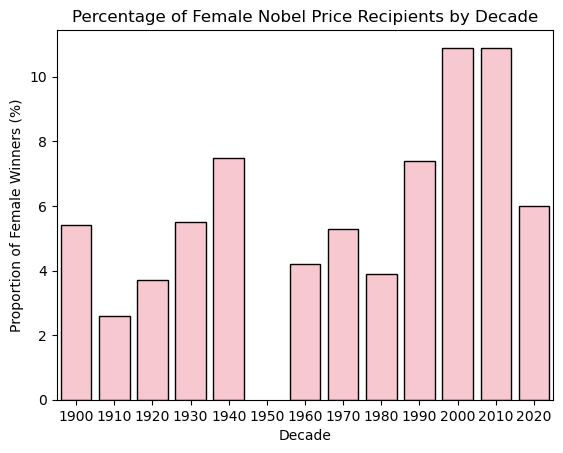

In [12]:
fx = round((nobelfemale['prize'] / gendertotal['prize'])*100, 1)

femp = sns.barplot(x = nobelgender["decade"], y = fx, color = "pink", edgecolor = "black")
plt.title("Percentage of Female Nobel Price Recipients by Decade")
plt.xlabel("Decade")
plt.ylabel("Proportion of Female Winners (%)")
plt.show()

**5. For the gender imbalance that you found in question 4, is it better or worse within specific prize categories? Visualize your results for each category and discuss. Which of them has the largest gender imbalance? Which has shown some positive trend over the decades?**

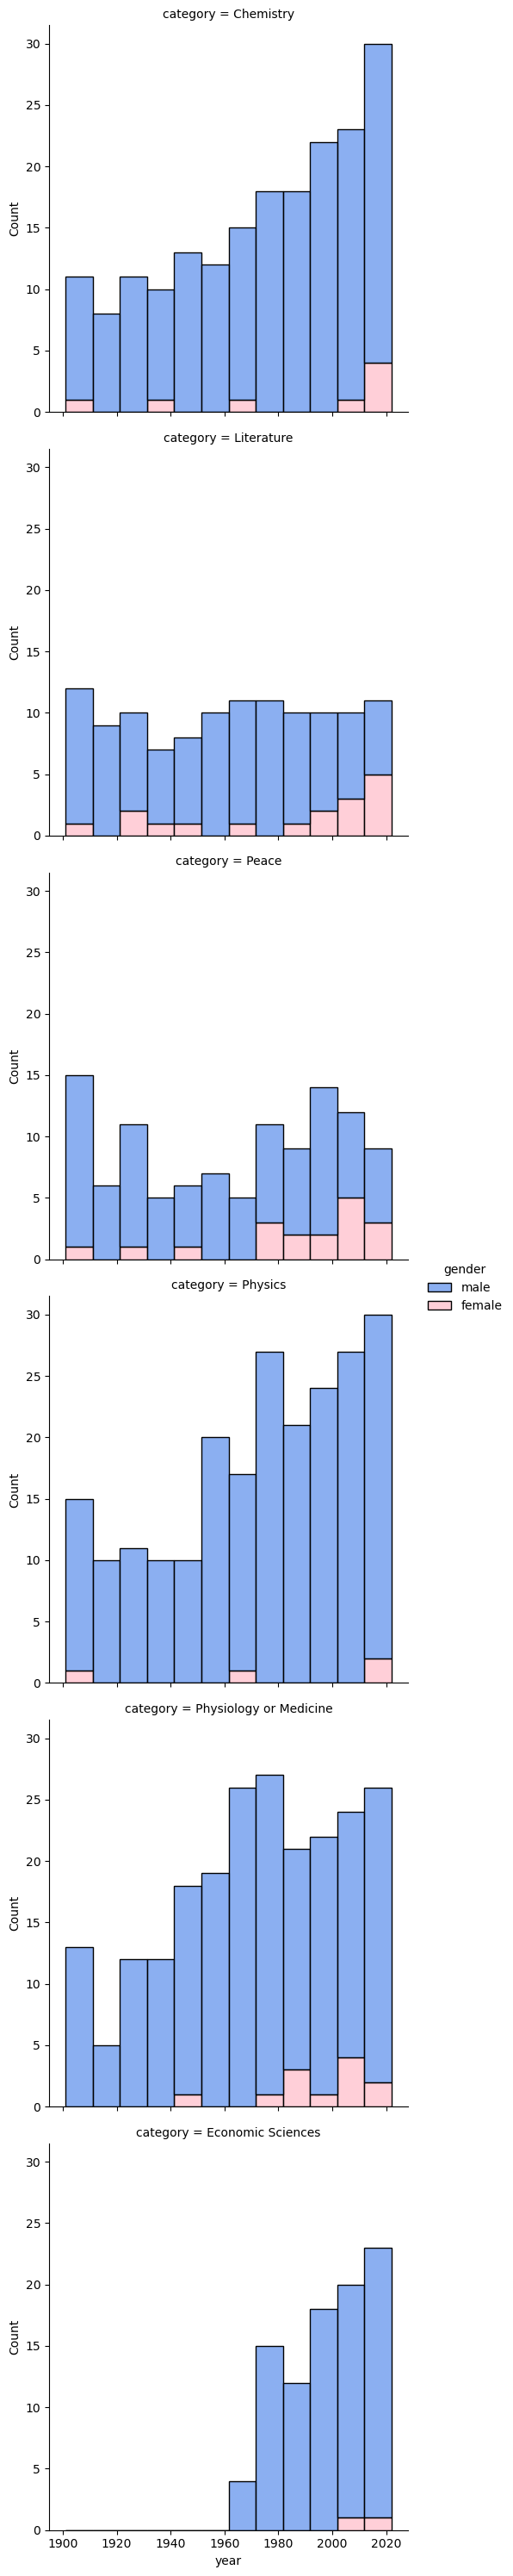

In [13]:
sns.displot(data = nobel, x = "year", hue = "gender", kind = "hist", multiple = "stack", row = "category",
           palette = ["cornflowerblue", "pink"])
plt.show()

**6. Are there any people who have won the Nobel Prize more than once? Who are they?**

In [14]:
win = nobelindividual['full_name'].value_counts()
morewin = win[win > 1]
print(morewin)

full_name
Linus Carl Pauling             2
Frederick Sanger               2
K. Barry Sharpless             2
Marie Curie, née Sklodowska    2
John Bardeen                   2
Name: count, dtype: int64


**7. Who are the oldest and youngest people ever to have won a Nobel Prize? How old were the winners generally when they got the prize? Show the summary statistics, and plot the distribution of the age of winners.**

In [15]:
nobelindividual["birth_date"] = pd.to_datetime(nobelindividual["birth_date"], errors="coerce")
nobelindividual["birth_year"] = nobelindividual["birth_date"].dt.year
nobelindividual.dropna(subset = ['birth_date'], inplace = True) 
nobelindividual["ageWin"] = nobelindividual["year"] - nobelindividual["birth_year"]
print(nobelindividual["ageWin"])

nobelindividual["ageWin"].describe()

0      49
1      62
2      79
3      73
4      56
       ..
954    60
955    75
956    77
957    80
958    67
Name: ageWin, Length: 959, dtype: int64


count    959.000000
mean      60.164755
std       12.638046
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: ageWin, dtype: float64

In [16]:
nobelindividual.loc[nobelindividual["ageWin"] == (nobelindividual["ageWin"].min()), "full_name"], nobelindividual["ageWin"].min()

(857    Malala Yousafzai
 Name: full_name, dtype: object,
 17)

In [17]:
nobelindividual["ageWin"].max()

97

In [18]:
nobelindividual["ageWin"].mean()

60.16475495307612

**8. For your results in question 7, does the average age of winners differ across each category? For each category, show the summary statistics and plot the distribution of the age of winners. Which categories have the largest and smallest average age of winners?**

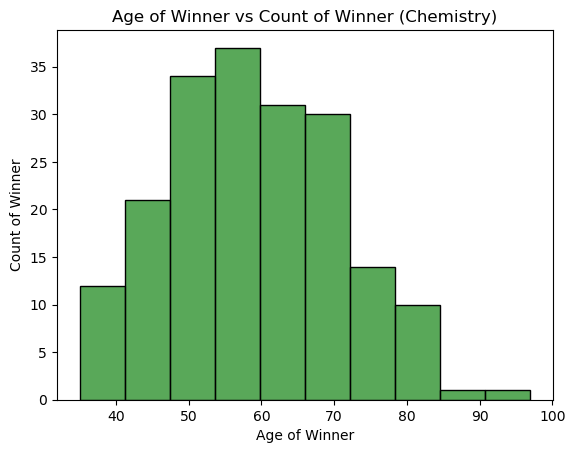

In [24]:
chem = nobelindividual[nobelindividual['category']=='Chemistry']
sns.histplot(x = chem['ageWin'], bins=10, edgecolor="black", color = "forestgreen")
plt.xlabel("Age of Winner")
plt.ylabel("Count of Winner")
plt.title("Age of Winner vs Count of Winner (Chemistry)")
plt.show()

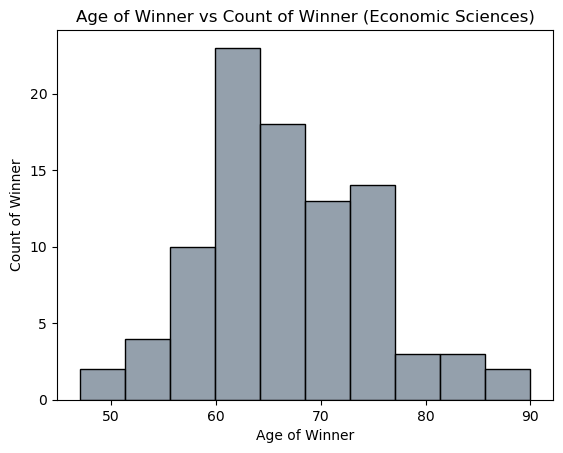

In [25]:
ecsci = nobelindividual[nobelindividual['category']=='Economic Sciences']
sns.histplot(ecsci['ageWin'], bins=10, edgecolor="black", color = "slategrey")
plt.xlabel("Age of Winner")
plt.ylabel("Count of Winner")
plt.title("Age of Winner vs Count of Winner (Economic Sciences)")
plt.show()

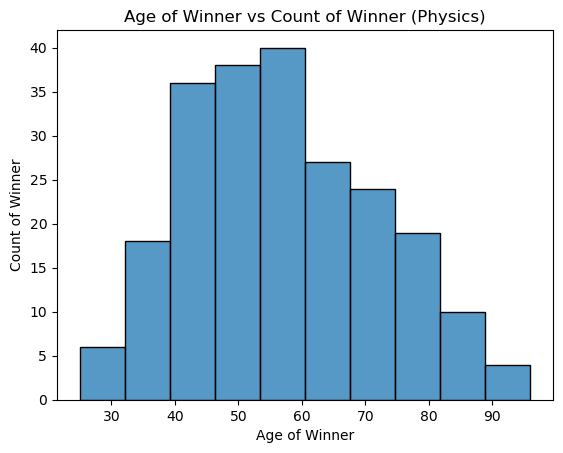

In [26]:
phys=nobelindividual[nobelindividual['category']=='Physics']
sns.histplot(phys['ageWin'],bins=10,edgecolor="black")
plt.xlabel("Age of Winner")
plt.ylabel("Count of Winner")
plt.title("Age of Winner vs Count of Winner (Physics)")
plt.show()

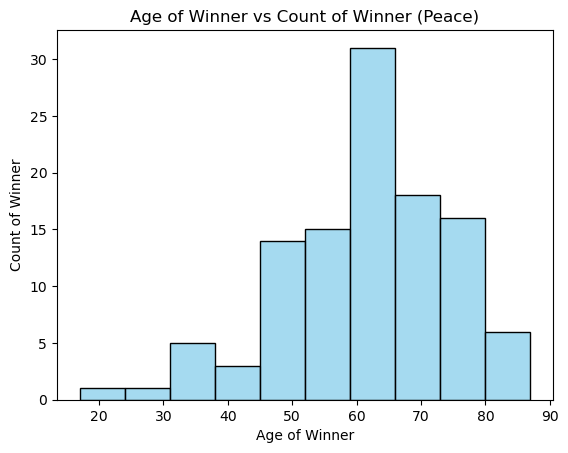

In [27]:
peace = nobelindividual[nobelindividual['category']=='Peace']
sns.histplot(peace['ageWin'],bins=10,edgecolor="black", color = "skyblue")
plt.xlabel("Age of Winner")
plt.ylabel("Count of Winner")
plt.title("Age of Winner vs Count of Winner (Peace)")
plt.show()

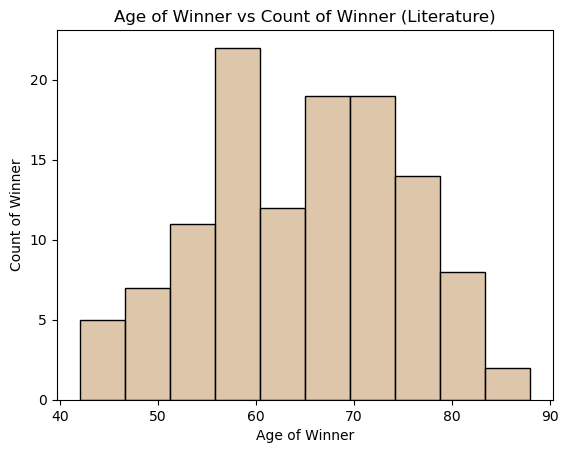

In [28]:
lit=nobelindividual[nobelindividual['category']=='Literature']
sns.histplot(lit['ageWin'],bins=10,edgecolor="black", color = "tan")
plt.xlabel("Age of Winner")
plt.ylabel("Count of Winner")
plt.title("Age of Winner vs Count of Winner (Literature)")
plt.show()


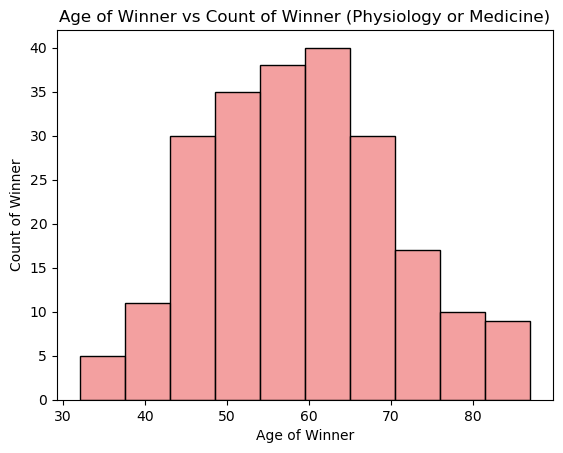

In [29]:
med=nobelindividual[nobelindividual['category']=='Physiology or Medicine']
sns.histplot(med['ageWin'], bins=10, edgecolor="black", color = "lightcoral")
plt.xlabel("Age of Winner")
plt.ylabel("Count of Winner")
plt.title("Age of Winner vs Count of Winner (Physiology or Medicine)")
plt.show()


In [30]:
ageWin_Cat = nobelindividual.groupby('category')['ageWin'].describe()
print(ageWin_Cat)

                        count       mean        std   min   25%   50%   75%  \
category                                                                      
Chemistry               191.0  58.905759  11.847785  35.0  50.0  58.0  68.0   
Economic Sciences        92.0  66.826087   8.264326  47.0  61.0  67.0  72.0   
Literature              119.0  65.008403  10.291922  42.0  57.0  67.0  73.0   
Peace                   110.0  60.863636  13.195410  17.0  54.0  62.0  71.0   
Physics                 222.0  57.099099  14.736574  25.0  46.0  55.5  68.0   
Physiology or Medicine  225.0  58.631111  11.727635  32.0  50.0  57.0  67.0   

                         max  
category                      
Chemistry               97.0  
Economic Sciences       90.0  
Literature              88.0  
Peace                   87.0  
Physics                 96.0  
Physiology or Medicine  87.0  


**9. Make some plots to visualize the time trend of the average age of winners in each specific category per decade. What do you find?**

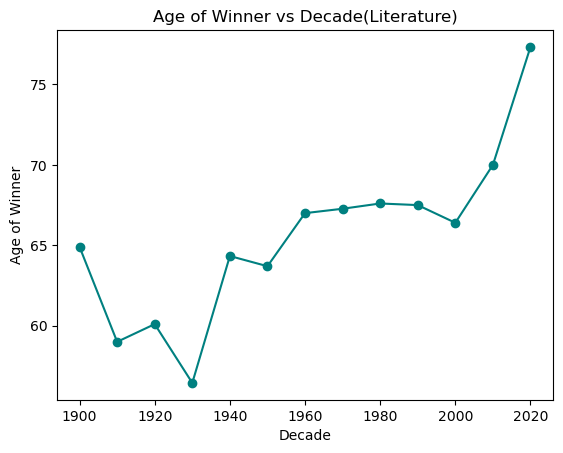

In [78]:
Lit = nobelindividual.loc[nobelindividual['category']=='Literature'].copy()
Lit['decade']=10*(Lit['year']//10)
Lit['decade']=Lit['decade'].astype('int64')
avg_ageWin_dec=Lit.groupby('decade')['ageWin'].mean()
#print(avg_ageWin_dec)

avg_ageWin_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Age of Winner")
plt.title("Age of Winner vs Decade(Literature)")
plt.show()

decade
1960    70.000000
1970    67.000000
1980    67.900000
1990    65.470588
2000    66.850000
2010    66.500000
2020    68.000000
Name: ageWin, dtype: float64


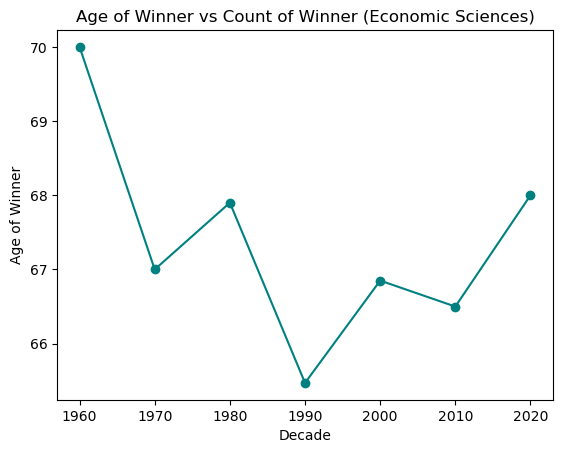

In [80]:
Eco = nobelindividual.loc[nobelindividual['category']=='Economic Sciences'].copy()
Eco['decade']=10*(Eco['year']//10)
Eco['decade']=Eco['decade'].astype('int64')
avg_ageWin_dec=Eco.groupby('decade')['ageWin'].mean()
print(avg_ageWin_dec)

avg_ageWin_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Age of Winner")
plt.title("Age of Winner vs Count of Winner (Economic Sciences)")
plt.show()

decade
1900    51.000000
1910    49.000000
1920    52.300000
1930    46.000000
1940    54.444444
1950    53.000000
1960    55.800000
1970    61.933333
1980    56.238095
1990    63.111111
2000    64.960000
2010    71.148148
2020    59.857143
Name: ageWin, dtype: float64


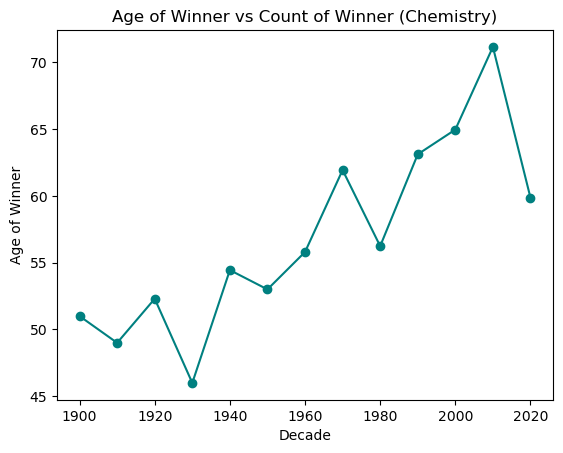

In [82]:
Chem=nobelindividual.loc[nobelindividual['category']=='Chemistry'].copy()
Chem['decade']=10*(Chem['year']//10)
Chem['decade']=Chem['decade'].astype('int64')
avg_ageWin_dec=Chem.groupby('decade')['ageWin'].mean()
print(avg_ageWin_dec)

avg_ageWin_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Age of Winner")
plt.title("Age of Winner vs Count of Winner (Chemistry)")
plt.show()

decade
1900    67.307692
1910    61.800000
1920    64.090909
1930    64.125000
1940    75.750000
1950    63.714286
1960    59.000000
1970    56.833333
1980    56.500000
1990    58.714286
2000    64.300000
2010    47.200000
2020    59.333333
Name: ageWin, dtype: float64


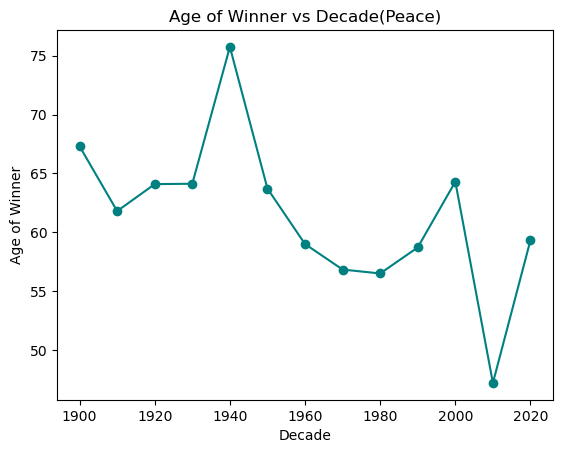

In [83]:
Pea=nobelindividual.loc[nobelindividual['category']=='Peace'].copy()
Pea['decade']=10*(Pea['year']//10)
Pea['decade']=Pea['decade'].astype('int64')
avg_ageWin_dec=Pea.groupby('decade')['ageWin'].mean()
print(avg_ageWin_dec)

avg_ageWin_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Age of Winner")
plt.title("Age of Winner vs Decade(Peace)")
plt.show()

decade
1900    49.230769
1910    48.100000
1920    45.583333
1930    41.272727
1940    51.142857
1950    49.800000
1960    50.235294
1970    53.720000
1980    59.409091
1990    60.045455
2000    68.500000
2010    67.692308
2020    77.444444
Name: ageWin, dtype: float64


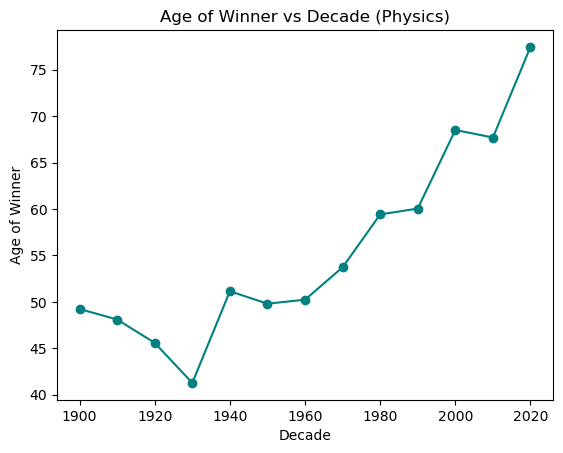

In [84]:
Phy=nobelindividual.loc[nobelindividual['category']=='Physics'].copy()
Phy['decade']=10*(Phy['year']//10)
Phy['decade']=Phy['decade'].astype('int64')
avg_ageWin_dec=Phy.groupby('decade')['ageWin'].mean()
print(avg_ageWin_dec)

avg_ageWin_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Age of Winner")
plt.title("Age of Winner vs Decade (Physics)")
plt.show()

decade
1900    56.000000
1910    49.166667
1920    53.909091
1930    54.714286
1940    56.000000
1950    51.800000
1960    55.000000
1970    56.720000
1980    60.739130
1990    60.450000
2000    63.538462
2010    68.333333
2020    68.500000
Name: ageWin, dtype: float64


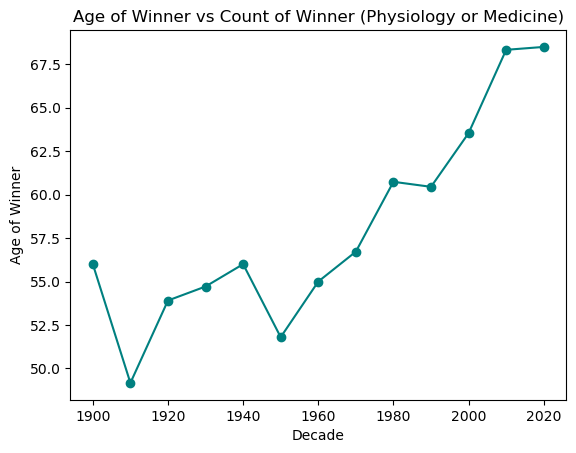

In [85]:
Med=nobelindividual.loc[nobelindividual['category']=='Physiology or Medicine'].copy()
Med['decade']=10*(Med['year']//10)
Med['decade']=Med['decade'].astype('int64')
avg_ageWin_dec=Med.groupby('decade')['ageWin'].mean()
print(avg_ageWin_dec)

avg_ageWin_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Age of Winner")
plt.title("Age of Winner vs Count of Winner (Physiology or Medicine)")
plt.show()

**10. Repeat the analysis in question 9, but with lifespan instead of age. What do you find?**

In [87]:
nobelindividual["birth_date"]=pd.to_datetime(nobelindividual["birth_date"],errors="coerce")
nobelindividual["birth_year"] = nobelindividual["birth_date"].dt.year
nobelindividual.dropna(subset=['birth_date'],inplace = True) 
nobelindividual["death_date"]=pd.to_datetime(nobelindividual["death_date"],errors="coerce")
nobelindividual["death_year"]=nobelindividual["death_date"].dt.year
nobelindividual.dropna(subset=['death_date'],inplace = True) 
nobelindividual["lifeSpan"]=nobelindividual["death_year"]-nobelindividual["birth_year"]
#print(df["birth_year"])
print(nobelindividual["lifeSpan"])

0      59.0
1      68.0
2      90.0
3      82.0
4      78.0
       ... 
829    68.0
833    93.0
859    92.0
881    85.0
904    98.0
Name: lifeSpan, Length: 658, dtype: float64


decade
1900    77.500000
1910    80.111111
1920    78.100000
1930    72.222222
1940    75.666667
1950    77.600000
1960    77.636364
1970    80.727273
1980    85.000000
1990    86.700000
2000    86.250000
2010    84.000000
Name: lifeSpan, dtype: float64


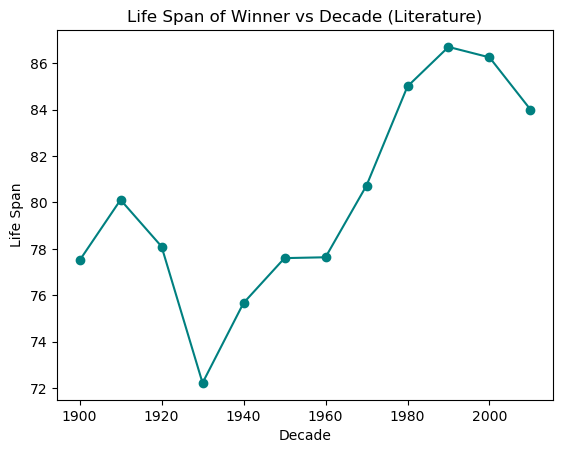

In [92]:
lit1 = nobelindividual.loc[nobelindividual['category']=='Literature'].copy()
lit1['decade']=10*(lit1['year']//10)
lit1['decade']=lit1['decade'].astype('int64')
lavg_lifeSpan_dec=lit1.groupby('decade')['lifeSpan'].mean()
print(lavg_lifeSpan_dec)

lavg_lifeSpan_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Life Span")
plt.title("Life Span of Winner vs Decade (Literature)")
plt.show()

decade
1900    66.333333
1910    68.875000
1920    76.500000
1930    73.461538
1940    80.444444
1950    82.357143
1960    80.333333
1970    83.466667
1980    88.909091
1990    82.733333
2000    83.666667
2010    85.000000
Name: lifeSpan, dtype: float64


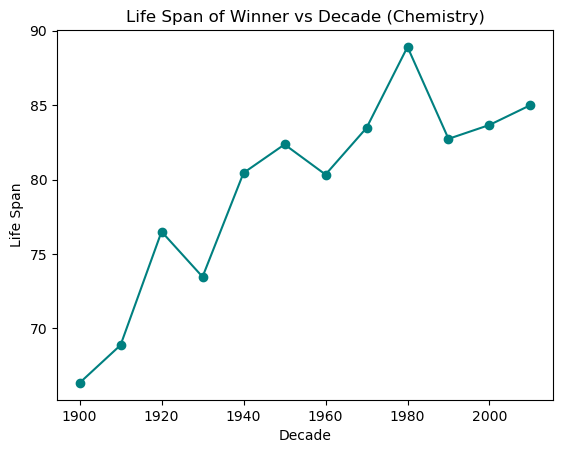

In [93]:
chem1=nobelindividual.loc[nobelindividual['category']=='Chemistry'].copy()
chem1['decade']=10*(chem1['year']//10)
chem1['decade']=chem1['decade'].astype('int64')
cavg_lifeSpan_dec=chem1.groupby('decade')['lifeSpan'].mean()
print(cavg_lifeSpan_dec)

cavg_lifeSpan_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Life Span")
plt.title("Life Span of Winner vs Decade (Chemistry)")
plt.show()


decade
1900    71.769231
1910    77.200000
1920    82.000000
1930    75.727273
1940    76.000000
1950    81.166667
1960    80.058824
1970    85.411765
1980    87.277778
1990    82.700000
2000    88.076923
2010    91.666667
Name: lifeSpan, dtype: float64


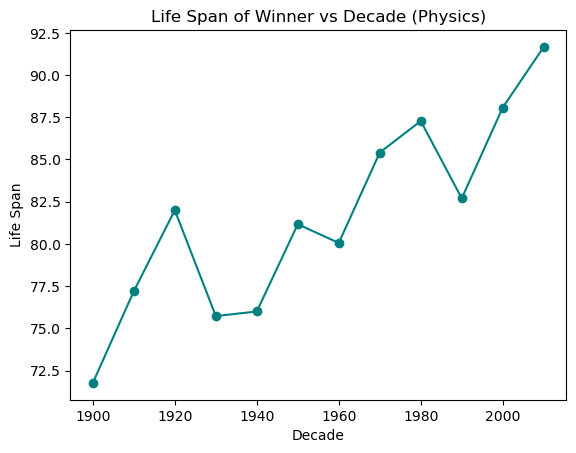

In [94]:
phys1=nobelindividual.loc[nobelindividual['category']=='Physics'].copy()
phys1['decade']=10*(phys1['year']//10)
phys1['decade']=phys1['decade'].astype('int64')
pavg_lifeSpan_dec=phys1.groupby('decade')['lifeSpan'].mean()
print(pavg_lifeSpan_dec)

pavg_lifeSpan_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Life Span")
plt.title("Life Span of Winner vs Decade (Physics)")
plt.show()

decade
1960    84.500000
1970    86.800000
1980    87.111111
1990    86.454545
2000    84.400000
2010    84.000000
Name: lifeSpan, dtype: float64


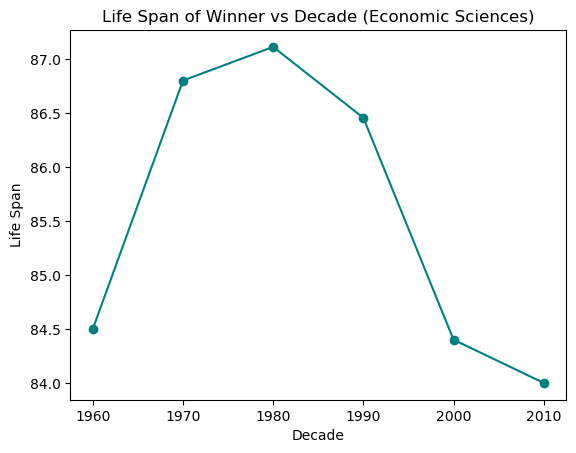

In [95]:
ecsci1=nobelindividual.loc[nobelindividual['category']=='Economic Sciences'].copy()
ecsci1['decade']=10*(ecsci1['year']//10)
ecsci1['decade']=ecsci1['decade'].astype('int64')
eavg_lifeSpan_dec=ecsci1.groupby('decade')['lifeSpan'].mean()
print(eavg_lifeSpan_dec)

eavg_lifeSpan_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Life Span")
plt.title("Life Span of Winner vs Decade (Economic Sciences)")
plt.show()

decade
1900    71.454545
1910    74.833333
1920    71.000000
1930    83.785714
1940    79.000000
1950    83.500000
1960    84.250000
1970    83.150000
1980    85.500000
1990    87.222222
2000    87.625000
2010    78.000000
Name: lifeSpan, dtype: float64


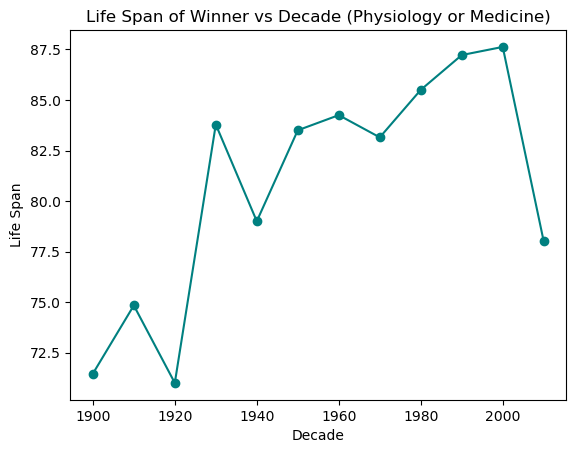

In [99]:
med1=nobelindividual.loc[nobelindividual['category']=='Physiology or Medicine'].copy()
med1['decade']=10*(med1['year']//10)
med1['decade']=med1['decade'].astype('int64')
mavg_lifeSpan_dec=med1.groupby('decade')['lifeSpan'].mean()
print(mavg_lifeSpan_dec)

mavg_lifeSpan_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Life Span")
plt.title("Life Span of Winner vs Decade (Physiology or Medicine)")
plt.show()

decade
1900    76.923077
1910    76.200000
1920    73.909091
1930    77.000000
1940    89.750000
1950    76.857143
1960    69.200000
1970    78.500000
1980    85.500000
1990    85.555556
2000    78.333333
2010    62.000000
Name: lifeSpan, dtype: float64


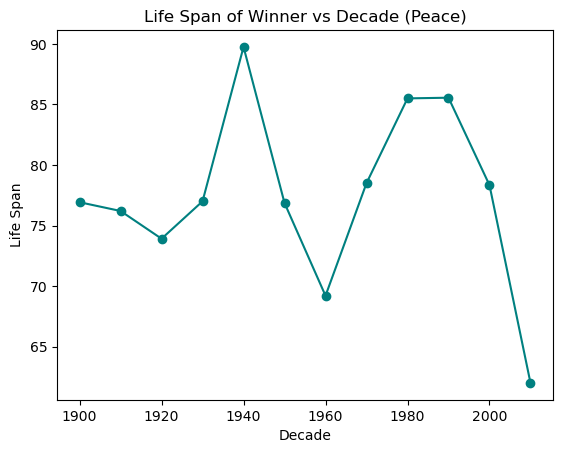

In [98]:
peace1=nobelindividual.loc[nobelindividual['category']=='Peace'].copy()
peace1['decade']=10*(peace1['year']//10)
peace1['decade']=peace1['decade'].astype('int64')
peavg_lifeSpan_dec=peace1.groupby('decade')['lifeSpan'].mean()
print(peavg_lifeSpan_dec)

peavg_lifeSpan_dec.plot( **{'color': 'teal', 'marker': 'o'})
plt.xlabel("Decade")
plt.ylabel("Life Span")
plt.title("Life Span of Winner vs Decade (Peace)")
plt.show()

## Part 2: COVID

In [75]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'] 

**11. Read the data (covid.csv) in your notebook and display the first 8 rows. How many columns 
and rows are there in this dataset? What are the column names?** \
blah blah

In [32]:
covid = pd.read_csv("data/covid.csv") #change to covid.csv
covid.head(8)

,Reported_Date,HA,Sex,Age_Group,Classification_Reported
0,2020-01-26,Out of Canada,M,40-49,Lab-diagnosed
1,2020-02-02,Vancouver Coastal,F,50-59,Lab-diagnosed
2,2020-02-05,Out of Canada,F,20-29,Lab-diagnosed
3,2020-02-05,Out of Canada,M,30-39,Lab-diagnosed
4,2020-02-11,Interior,F,30-39,Lab-diagnosed
5,2020-02-20,Fraser,F,30-39,Lab-diagnosed
6,2020-02-21,Fraser,M,40-49,Lab-diagnosed
7,2020-02-27,Vancouver Coastal,F,60-69,Lab-diagnosed


In [ ]:
covid.shape

In [ ]:
covid.columns

**12. Create a new column Month to represent the month of the Reported_Date in the data. Print 
the first 8 rows of updated dataframe.**

In [58]:
#covid['Month'] = covid['Reported_Date'].astype('str').str[6:7]
covid["Reported_Date"] = pd.to_datetime(covid["Reported_Date"])
covid["Month"] = covid["Reported_Date"].dt.month
#covid["Month"] = covid["Month"].map({1: 'Jan', 2: 'Feb', 3:'Mar', 4: 'Apr', 5: 'May',
                                     #6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct'})
covid.head(8)

,Reported_Date,HA,Sex,Age_Group,Classification_Reported,Month
0,2020-01-26,Out of Canada,M,40-49,Lab-diagnosed,1
1,2020-02-02,Vancouver Coastal,F,50-59,Lab-diagnosed,2
2,2020-02-05,Out of Canada,F,20-29,Lab-diagnosed,2
3,2020-02-05,Out of Canada,M,30-39,Lab-diagnosed,2
4,2020-02-11,Interior,F,30-39,Lab-diagnosed,2
5,2020-02-20,Fraser,F,30-39,Lab-diagnosed,2
6,2020-02-21,Fraser,M,40-49,Lab-diagnosed,2
7,2020-02-27,Vancouver Coastal,F,60-69,Lab-diagnosed,2


**13. Create a new dictionary which contains the months as keys and the number of cases for 
corresponding months as values. Show the dictionary. What is the largest number of cases 
in the dictionary?**

In [59]:
covidcount = covid['Month'].value_counts(sort = False).to_frame()

monthdict = covidcount["count"].to_dict()
print(monthdict)

{1: 1, 2: 8, 3: 1049, 4: 1088, 5: 447, 6: 337, 7: 760, 8: 2180, 9: 3392, 10: 3292}


**14. Make some plots to visualize the time trend of the number of cases in every month. What do you find?**

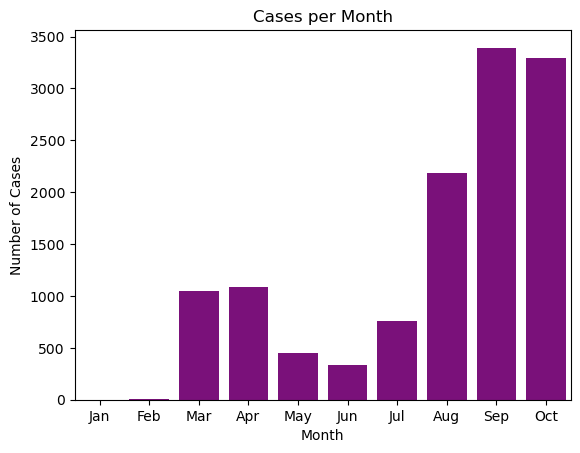

In [66]:
m = covid['Month'].value_counts().reset_index()
n = m.sort_values('Month')
n
x = n['Month']
y = n['count']

caseplot = sns.barplot(x = n['Month'], y = n['count'], color='darkmagenta')
caseplot.set_xticks(range(10))
caseplot.set_xticklabels(months)
plt.title("Cases per Month")
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()


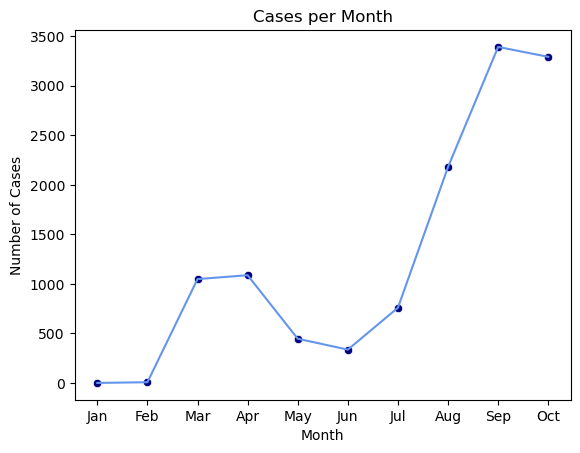

In [74]:
countplot = sns.lineplot(data = covid, x = n['Month'], y = n['count'], color = "cornflowerblue", errorbar = None)
sns.scatterplot(data = covid, x = n['Month'], y = n['count'], color = "navy")
countplot.set_xticks(range(1,11))
countplot.set_xticklabels(months)
plt.title("Cases per Month")
plt.ylabel('Number of Cases')
plt.show()

**15. Is there any gender imbalance in this data? Visualize the time trend of the number of cases 
for each gender and discuss.**

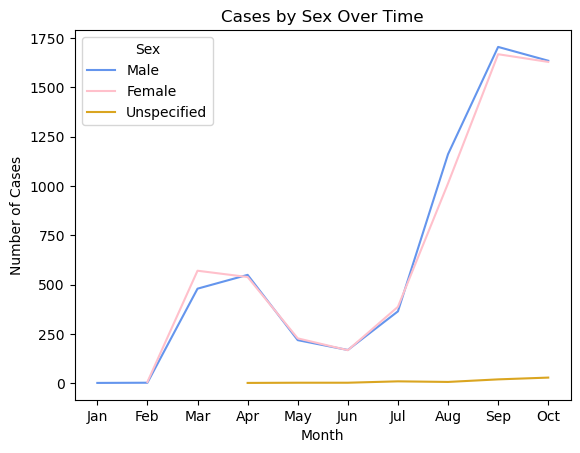

In [38]:
datecount = covid[["Month", "Sex"]].groupby(["Month"]).value_counts().reset_index()
datecount.rename(columns = {"count": "Number of Cases"}, inplace = True)

timeplot = sns.lineplot(data = datecount, x = "Month", y = "Number of Cases", hue = "Sex",
                        palette = ["cornflowerblue", "pink", "goldenrod"], errorbar = None)
timeplot.set_xticks(range(1,11))
timeplot.set_xticklabels(months)
plt.title("Cases by Sex Over Time")
plt.legend(title = "Sex", labels = ["Male", "Female", "Unspecified"])
plt.show()

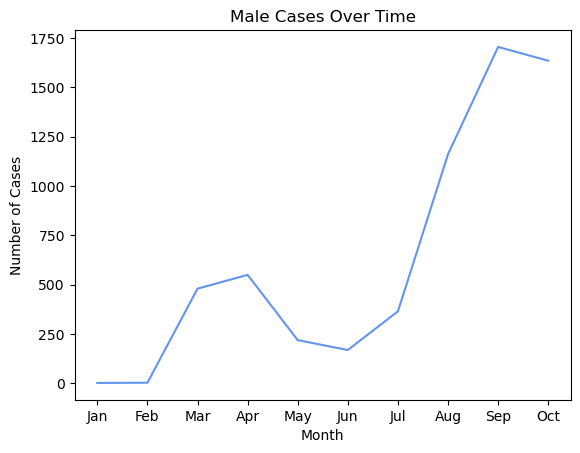

In [39]:
mcount = datecount[datecount["Sex"] == "M"]
mplot = sns.lineplot(data = mcount, x = "Month", y = "Number of Cases",
                        color = "cornflowerblue", errorbar = None)
mplot.set_xticks(range(1,11))
mplot.set_xticklabels(months)
plt.title("Male Cases Over Time")
plt.show()

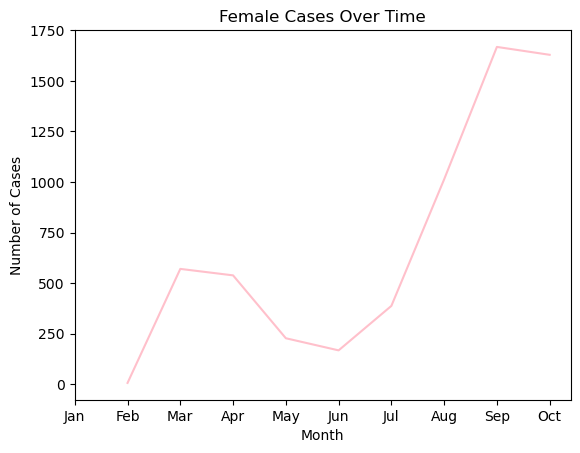

In [40]:
fcount = datecount[datecount["Sex"] == "F"]
fplot = sns.lineplot(data = fcount, x = "Month", y = "Number of Cases",
                        color = "pink", errorbar = None)
fplot.set_xticks(range(1,11))
fplot.set_xticklabels(months)
plt.title("Female Cases Over Time")
plt.show()

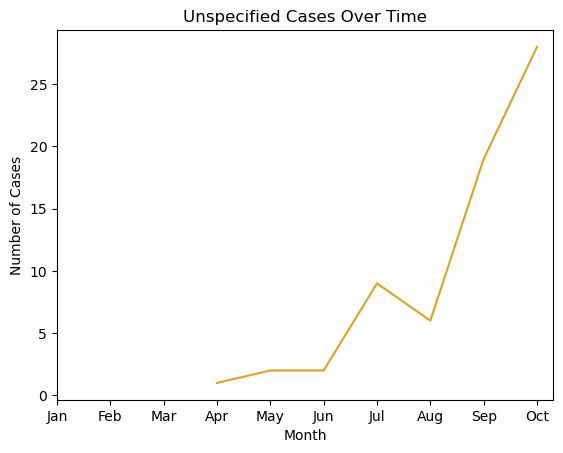

In [41]:
ucount = datecount[datecount["Sex"] == "U"]
uplot = sns.lineplot(data = ucount, x = "Month", y = "Number of Cases",
                        color = "goldenrod", errorbar = None)
uplot.set_xticks(range(1,11))
uplot.set_xticklabels(months)
plt.title("Unspecified Cases Over Time")
plt.show()

**16. Create new dictionaries which contain the months as keys and the number of cases for 
corresponding months per each gender as values. Show the dictionaries. Find the month 
with the smallest number of female cases.** \
The month with the least number of female cases was February, likely because this marked the beginning of the pandemic.

In [42]:
maledict = datecount[datecount["Sex"] == "M"].set_index("Month")["Number of Cases"].to_dict()
print(maledict)

{1: 1, 2: 2, 3: 479, 4: 549, 5: 218, 6: 168, 7: 364, 8: 1161, 9: 1705, 10: 1635}


In [43]:
femaledict = datecount[datecount["Sex"] == "F"].set_index("Month")["Number of Cases"].to_dict()
print(femaledict)

{2: 6, 3: 570, 4: 538, 5: 227, 6: 167, 7: 387, 8: 1013, 9: 1668, 10: 1629}


In [44]:
min(femaledict, key = femaledict.get)

2

**17. Is there any imbalance among different regions in this data? Make some plots to visualize 
the difference among the regions in terms of reported cases in every month, and discuss 
your results.**

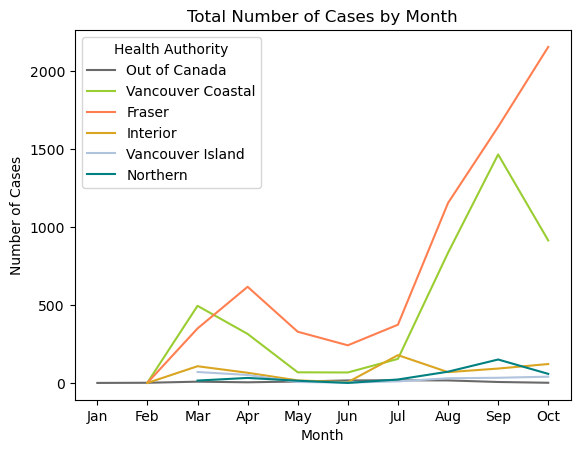

In [45]:
regioncount = covid[["Month", "HA"]].groupby(["Month"]).value_counts().reset_index()
regioncount.rename(columns = {"count": "Number of Cases"}, inplace = True)
regionplot = sns.lineplot(data = regioncount, x = "Month", y = "Number of Cases", hue = "HA",
                          palette = ["dimgrey", "yellowgreen", "coral", "goldenrod", "lightsteelblue", "teal"])

regionplot.set_xticks(range(1,11))
regionplot.set_xticklabels(months)
plt.title("Total Number of Cases by Month")
plt.legend(title = "Health Authority")
plt.show()

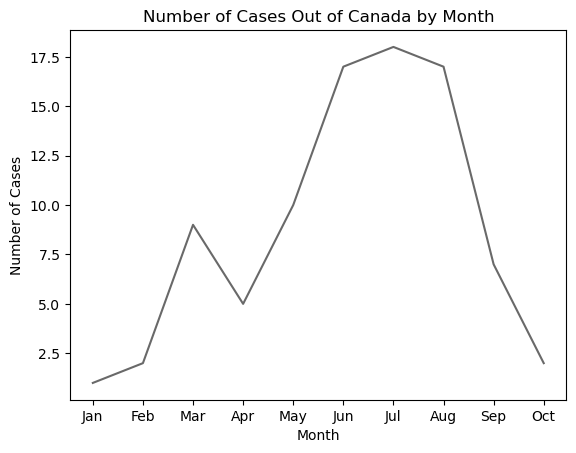

In [46]:
ooc = regioncount[regioncount["HA"] == "Out of Canada"]
oocplot = sns.lineplot(data = ooc, x = "Month", y = "Number of Cases", color = "dimgrey")
oocplot.set_xticks(range(1,11))
oocplot.set_xticklabels(months)
plt.title("Number of Cases Out of Canada by Month")
plt.show()

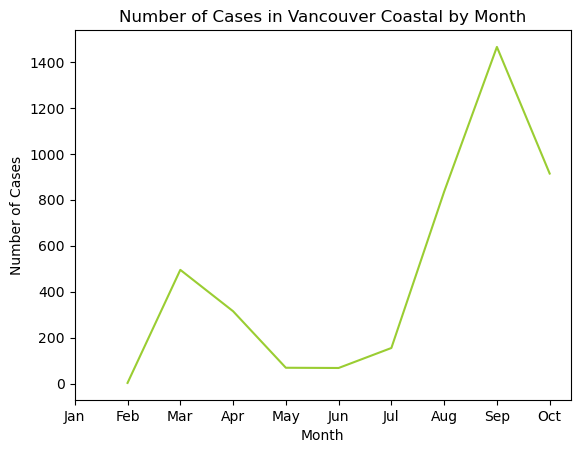

In [47]:
vc = regioncount[regioncount["HA"] == "Vancouver Coastal"]

vcplot = sns.lineplot(data = vc, x = "Month", y = "Number of Cases", color = "yellowgreen")
vcplot.set_xticks(range(1,11))
vcplot.set_xticklabels(months)
plt.title("Number of Cases in Vancouver Coastal by Month")
plt.show()

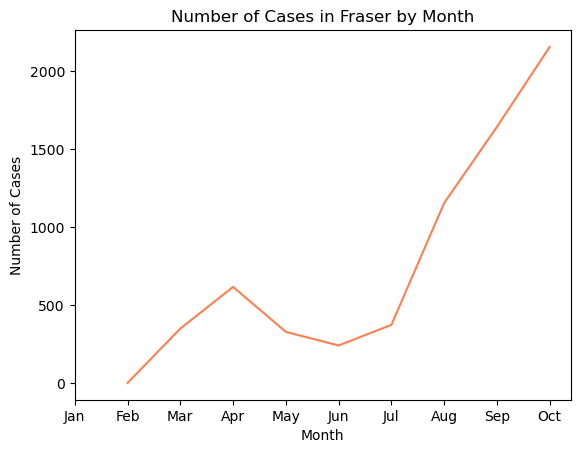

In [48]:
f = regioncount[regioncount["HA"] == "Fraser"]

fplot = sns.lineplot(data = f, x = "Month", y = "Number of Cases", color = "coral")
fplot.set_xticks(range(1,11))
fplot.set_xticklabels(months)
plt.title("Number of Cases in Fraser by Month")
plt.show()

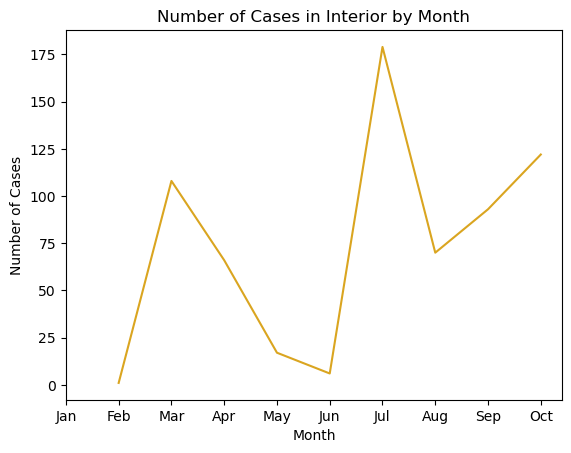

In [49]:
i = regioncount[regioncount["HA"] == "Interior"]

iplot = sns.lineplot(data = i, x = "Month", y = "Number of Cases", color = "goldenrod")
iplot.set_xticks(range(1,11))
iplot.set_xticklabels(months)
plt.title("Number of Cases in Interior by Month")
plt.show()

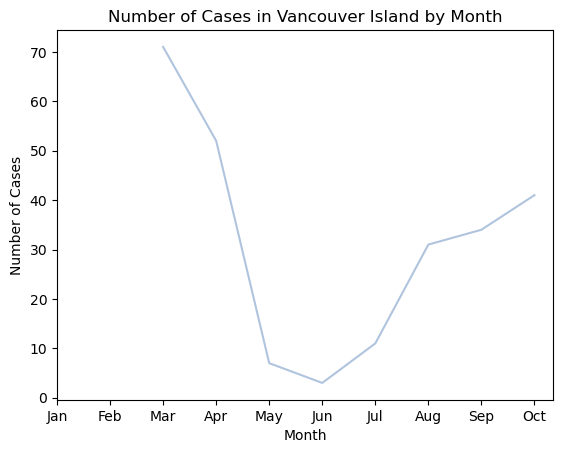

In [50]:
vi = regioncount[regioncount["HA"] == "Vancouver Island"]

viplot = sns.lineplot(data = vi, x = "Month", y = "Number of Cases", color = "lightsteelblue")
viplot.set_xticks(range(1,11))
viplot.set_xticklabels(months)
plt.title("Number of Cases in Vancouver Island by Month")
plt.show()

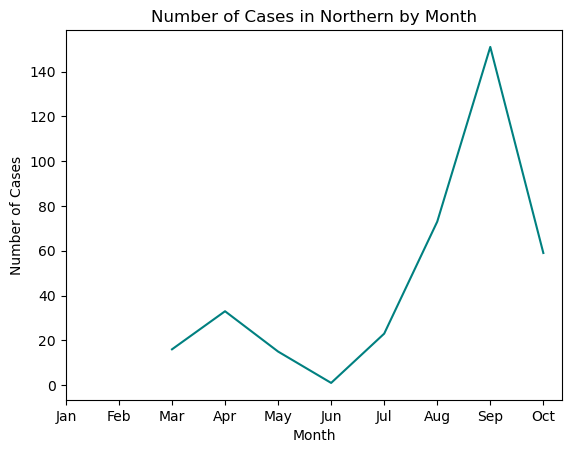

In [51]:
n = regioncount[regioncount["HA"] == "Northern"]

nplot = sns.lineplot(data = n, x = "Month", y = "Number of Cases", color = "teal")
nplot.set_xticks(range(1,11))
nplot.set_xticklabels(months)
plt.title("Number of Cases in Northern by Month")
plt.show()

**18. Calculate the cumulative reported cases in every month for each region. Print the first 8 
rows. Visualize the difference among the regions in terms of cumulative reported cases in 
every month, and discuss your results.**

In [110]:
#covid['Reported_Date']=pd.to_datetime(covid['Reported_Date'])
#covid['yearMonth']=covid['Reported_Date'].dt.to_period('M')
#test=covid.groupby(['HA','yearMonth']).value_counts().reset_index(name='test')
#test['CumCase']=test.groupby('HA')['test'].cumsum()
#print(test[['HA', 'Month', 'CumCase']].head(8))

regionmonth = covid[["Month", "HA"]].groupby(["Month", "HA"]).value_counts().reset_index()
regionmonth.rename(columns = {"count": "Number of Cases"}, inplace = True)
regionmonth.head(8)

,Month,HA,Number of Cases
0,1,Out of Canada,1
1,2,Fraser,2
2,2,Interior,1
3,2,Out of Canada,2
4,2,Vancouver Coastal,3
5,3,Fraser,350
6,3,Interior,108
7,3,Northern,16


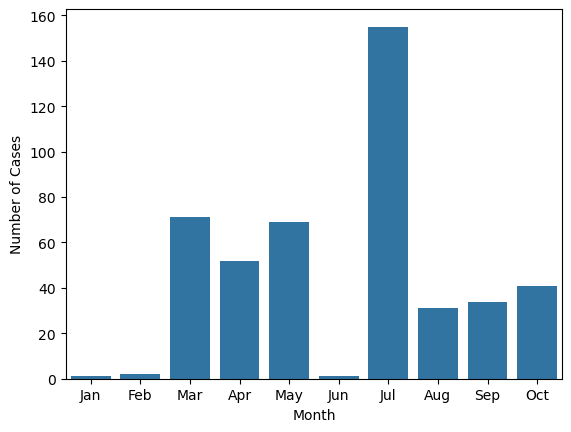

In [114]:
oocmonth = regionmonth[regioncount["HA"] == "Out of Canada"]

oocmonthplot = sns.barplot(data = oocmonth, x = "Month", y = "Number of Cases")
oocmonthplot.set_xticks(range(10))
oocmonthplot.set_xticklabels(months)
plt.show()

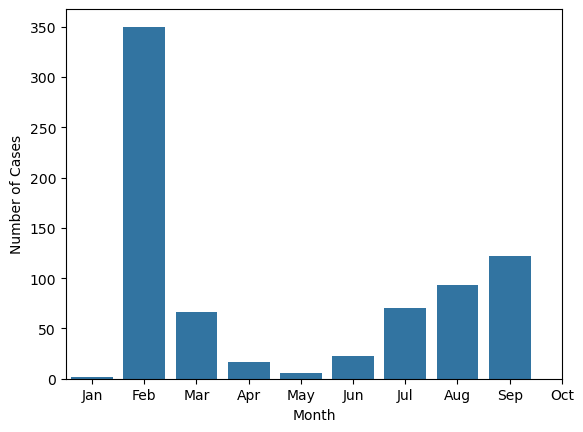

In [116]:
vcmonth = regionmonth[regioncount["HA"] == "Vancouver Coastal"]

vcmonthplot = sns.barplot(data = vcmonth, x = "Month", y = "Number of Cases")
vcmonthplot.set_xticks(range(10))
vcmonthplot.set_xticklabels(months)
plt.show()

**19. Open question: what else can you find from this data?**